<a href="https://colab.research.google.com/github/silentvoice/dl-with-pytorch/blob/master/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

## Install Dependencies

In [65]:
!pip install torch torchvision

## Import the required packages

In [0]:
import numpy as np

In [0]:
import torch

In [0]:
import torchvision

In [0]:
import matplotlib.pyplot as plt

In [0]:
from torch import nn

In [0]:
import torch.nn.functional as F

In [0]:
from torchvision import datasets, transforms

In [0]:
from collections import OrderedDict

## Load MNIST Dataset

### Create a transform to normalize the MNIST Data

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

### Download MNIST Data

In [0]:
mnist_train_dataset = datasets.MNIST('mnist_train_data', download=True, train=True, transform=transform)

In [0]:
mnist_train_data_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=64, shuffle=True)

### Check sample MNIST image

In [0]:
train_data_iterator = iter(mnist_train_data_loader)

In [0]:
train_images, train_labels = train_data_iterator.next()

In [79]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [16]:
train_labels.shape

torch.Size([64])

In [80]:
train_labels

tensor([8, 5, 3, 8, 3, 5, 9, 9, 4, 8, 2, 1, 3, 8, 4, 7, 6, 3, 2, 4, 7, 6, 8, 7,
        1, 5, 4, 4, 7, 9, 0, 9, 1, 3, 0, 1, 4, 8, 1, 4, 7, 5, 1, 5, 8, 9, 7, 2,
        8, 0, 9, 7, 1, 5, 3, 1, 2, 2, 4, 0, 5, 3, 6, 4])

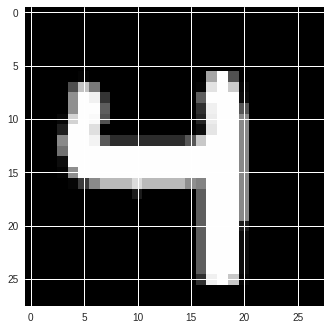

In [83]:
plt.imshow(train_images[63].numpy().squeeze(), cmap='gray')

## Build Simple Neural Network

In [0]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Defining Neural Network Layers
        
        # Inputs to hidden layer 
        self.hidden_layer = nn.Linear(784, 256)
        
        # Output layer, 10 units - one for each digit
        self.output_layer = nn.Linear(256, 10)
        
       
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        
        # Hidden layer with relu activation
        x = F.relu(self.hidden_layer(x))
        
        # Output layer with softmax activation
        x = F.softmax(self.output_layer(x), dim=1)
        
        return x

In [0]:
model = NeuralNetwork()

In [87]:
model

NeuralNetwork(
  (hidden_layer): Linear(in_features=784, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)

In [88]:
model.hidden_layer

Linear(in_features=784, out_features=256, bias=True)

In [91]:
model.hidden_layer.weight

Parameter containing:
tensor([[-0.0074,  0.0246, -0.0022,  ..., -0.0072, -0.0064,  0.0072],
        [ 0.0088, -0.0035, -0.0294,  ..., -0.0015,  0.0317,  0.0110],
        [-0.0020, -0.0297,  0.0251,  ...,  0.0043, -0.0045, -0.0243],
        ...,
        [ 0.0207,  0.0235,  0.0051,  ...,  0.0214,  0.0127,  0.0052],
        [ 0.0075, -0.0013, -0.0140,  ...,  0.0079, -0.0142,  0.0102],
        [ 0.0198,  0.0309, -0.0052,  ...,  0.0308,  0.0277,  0.0226]],
       requires_grad=True)

In [92]:
model.hidden_layer.bias

Parameter containing:
tensor([ 1.0603e-02,  5.3240e-03, -3.1488e-03, -3.5443e-02, -1.7900e-02,
         2.0917e-02, -3.0993e-02,  8.3178e-03,  1.8445e-02, -2.5254e-02,
        -2.4799e-02,  2.1171e-03,  1.7996e-02,  3.2114e-02,  1.4576e-03,
         3.1287e-02,  3.1876e-02, -1.7961e-03, -3.0859e-02, -6.9890e-03,
        -3.4470e-02,  3.2287e-02, -6.6298e-04,  3.2993e-02,  2.0128e-02,
        -1.3109e-02, -3.4858e-02,  2.2103e-02,  3.1183e-02,  6.4761e-03,
         2.8369e-02, -2.9250e-02,  1.5490e-02, -1.8439e-02, -5.7438e-03,
        -2.3530e-02,  9.5229e-03, -2.0874e-02, -1.6325e-02, -2.1834e-02,
         2.6869e-03,  3.5207e-02,  8.4175e-03, -7.0450e-03, -3.0584e-02,
        -7.7795e-03,  2.3968e-02,  2.1684e-02, -3.4559e-02, -2.1114e-02,
         1.1207e-03,  3.4758e-03, -3.0347e-02, -1.8651e-02, -7.6235e-03,
        -3.2902e-02,  2.7477e-02, -1.7850e-02, -1.5166e-02, -2.0678e-02,
        -2.0761e-02,  3.0013e-03,  1.9726e-02, -5.5569e-03,  2.4312e-03,
        -1.7634e-02,  6.5209e

## Define a loss function

In [0]:
criterion = nn.CrossEntropyLoss()

### Calculating loss for a single batch

In [95]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [0]:
train_images_batch = train_images.view(train_images.shape[0], -1)

In [97]:
train_images_batch.shape

torch.Size([64, 784])

In [0]:
output_predictions = model(train_images_batch)

In [0]:
loss = criterion(output_predictions, train_labels)


In [100]:
loss

tensor(2.3025, grad_fn=<NllLossBackward>)

## Train the network

### Define optimizer

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Training using the training images

In [102]:
epochs = 8
for e in range(epochs):
  
    training_loss = 0
    for train_images, train_labels in mnist_train_data_loader:

        # Flatten train images batch 
        images = train_images.view(train_images.shape[0], -1)
    
        # Make the gradient values to zero
        optimizer.zero_grad()
        
        # get output predictions from the images
        output_predictions = model(images)
        
        # Calculate loss
        loss = criterion(output_predictions, train_labels)
        
        # Do a backward pass to find the gradients
        loss.backward()
        
        # Update the weights of the parameters
        optimizer.step()
        
        training_loss += loss.item()
     
    else:
        print(f"Training loss for epoch - {e}: {training_loss/len(mnist_train_data_loader)}")
        
       

Training loss for epoch - 0: 2.2109118236153367
Training loss for epoch - 1: 1.9148478128000108
Training loss for epoch - 2: 1.7970954192472672
Training loss for epoch - 3: 1.727227399979573
Training loss for epoch - 4: 1.6798350539034619
Training loss for epoch - 5: 1.662363017037479
Training loss for epoch - 6: 1.6527714126908195
Training loss for epoch - 7: 1.6464421489853849


## Inference on a digit

In [0]:
images, labels = next(iter(mnist_train_data_loader))

In [0]:
infer_img = images[1].view(1, 784)

In [0]:
with torch.no_grad():
    output_prediction = model(infer_img)

In [140]:
output_prediction.shape

torch.Size([1, 10])

In [0]:
probabilities = output_prediction.data.numpy().squeeze()

In [142]:
probabilities.shape

(10,)

In [143]:
probabilities

array([1.0259878e-05, 1.7082199e-09, 3.9221057e-05, 1.2606553e-10,
       6.9357616e-06, 5.4579822e-08, 9.9993396e-01, 1.9780834e-10,
       8.8604229e-06, 6.7455119e-07], dtype=float32)

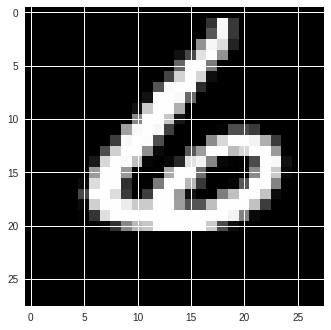

In [145]:
plt.imshow(infer_img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')